SELECT ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS FROM mh.iesrais;

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import graphviz
from google.cloud import bigquery
import pandas as pd

In [ ]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Pegando os dados após o cruzamento com o CNPJ

In [ ]:
#file_name = "Cr_BSI_1_2"
#file_name = "CrMat_1_2"
file_name = "CrEngProd_1_2"

In [ ]:
data = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name+".xlsx")

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,grade_linear_algebra,grade_eng_introduction,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria
0,0,0,PAULA SIMONE GUEIROS VILAÇA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.8,F,APV- Aprovado,...,0,NaN,Concluido,***743957**,11174395770,2016-12-13,0,Não é empresário,Não é empresário,Não é empresário
1,71,71,ELSIO DA SILVA QUARESMA NETO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.1,M,APV- Aprovado,...,0,NaN,Concluido,***990507**,13699050769,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário
2,192,192,RACHEL GOULART BERTO,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.4,F,APV- Aprovado,...,0,NaN,Concluido,***828197**,15382819700,2018-03-08,0,Não é empresário,Não é empresário,Não é empresário
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,0,NaN,Evadido,***877547**,14487754771,2019-12-13,0,Não é empresário,Não é empresário,Não é empresário
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,0,NaN,Concluido,***006667**,12900666716,2019-04-02,0,Não é empresário,Não é empresário,Não é empresário
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,6227515,7849,JOAO PAULO DE FREITAS RIBEIRO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,M,REF - Reprovado por falta,...,0,NaN,Evadido,***669781**,7766978113,2024-02-06,0,Não é empresário,Não é empresário,Não é empresário
258,6227522,7856,NATALY RIBEIRO DE OLIVEIRA,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,F,REF - Reprovado por falta,...,0,NaN,Evadido,***723557**,17472355712,2023-03-17,0,Não é empresário,Não é empresário,Não é empresário
259,6227533,7867,ANA CAROLINA DA SILVA DE SOUZA,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.5,F,REF - Reprovado por falta,...,0,NaN,Evadido,***079397**,19807939720,2023-08-24,0,Não é empresário,Não é empresário,Não é empresário
260,6227540,7874,DANIELA SANTIAGO AMORIM TEIXEIRA,2024.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,7.1,F,APV- Aprovado,...,0,NaN,Evadido,***166507**,18916650739,2024-02-19,0,Não é empresário,Não é empresário,Não é empresário


In [ ]:
# prompt: Pegue as colunas cujo NOME_PESSOA =" EDUARDO BRAGA AMARAL DE BRITO"

data[data["NOME_PESSOA"] == "EDUARDO BRAGA AMARAL DE BRITO"]


,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,grade_linear_algebra,grade_eng_introduction,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria


# Pegando os dados da RAIS

In [ ]:
rais = pd.read_csv("/content/gdrive/My Drive/dados_mestrado/RAIS2021.csv", sep=';')


In [ ]:
rais

,ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS
0,9,2,9,2161.82,15578274781,THAMARA RODRIGUES DE OLIVEIRA ...,2021
1,9,2,2,3301.12,13894969709,JULIA SANTANA DE AGUIAR ...,2021
2,9,2,2,6853.60,12049617780,YASMIM MADEIRO PASSARELLO REIS ...,2021
3,9,2,8,33.30,51625890206,IONAR IOLLANDA RIBEIRO DA SILVA ...,2021
4,9,2,8,97.97,11791348777,BRUNA PONTES DA SILVEIRA ...,2021
...,...,...,...,...,...,...,...
221570,9,2,99,2671.90,8100466793,ANNA VALQUIRIA LOPES MAGALHAES ...,2021
221571,9,1,4,3803.29,8891749702,MAXIMILIANO DE SOUZA ...,2021
221572,9,2,2,0.00,13440033708,FERNANDA SIQUEIRA LIMA ...,2021
221573,9,2,99,23429.70,11043507779,REBECA SAMPAIO LIMA E SILVA ...,2021


In [ ]:
rais[rais["NOME"] == "EDUARDO BRAGA AMARAL DE BRITO"]


,ESCOLARIDADE,SEXO,RACA,SALARIO,CPF,NOME,ANORAIS
31901,9,1,2,90.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2020
63616,9,1,2,7360.50,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2019
95318,9,1,2,24.00,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2018
154361,9,1,2,3218.66,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2016
186367,9,1,2,2964.87,12410344780,EDUARDO BRAGA AMARAL DE BRITO,2015


In [ ]:
# prompt: Junte data com rais através de data.NOME_PESSOA = rais.NOME e data_CPF_MASCARA = rais.CPF

merged_data = pd.merge(data, rais, left_on=['NOME_PESSOA', 'CPF_MASCARA'], right_on=['NOME', 'CPF'])
merged_data

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO_x,DESCR_SITUACAO,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
0,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,7,1,99,38.25,14487754771,CEZAR AUGUSTO PUREZA FIGUEIREDO,2020
1,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,1990.99,14487754771,CEZAR AUGUSTO PUREZA FIGUEIREDO,2018
2,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,1990.99,14487754771,CEZAR AUGUSTO PUREZA FIGUEIREDO,2017
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,7,1,9,17.23,14487754771,CEZAR AUGUSTO PUREZA FIGUEIREDO,2016
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,36.60,12900666716,RODRIGO GRANJA COSTA,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,6227487,7821,REGINALDO DOS SANTOS HONORATO,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,8,2,2,1316.08,12471769756,REGINALDO DOS SANTOS HONORATO,2017
677,6227487,7821,REGINALDO DOS SANTOS HONORATO,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,8,2,2,1233.44,12471769756,REGINALDO DOS SANTOS HONORATO,2016
678,6227487,7821,REGINALDO DOS SANTOS HONORATO,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,8,1,9,1125.07,12471769756,REGINALDO DOS SANTOS HONORATO,2015
679,6227522,7856,NATALY RIBEIRO DE OLIVEIRA,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,F,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,5,2,4,622.48,17472355712,NATALY RIBEIRO DE OLIVEIRA,2020


In [ ]:
#merged_data['DT_EVASAO'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')
#merged_data['ANORAIS'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')
#merged_data['ANO_INGRESSO'] = pd.to_datetime(merged_data['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')


In [ ]:
# prompt: Filtre merged_data por ANOSRAIS > ANO_INGRESSO ou ANOSRAIS < DT_EVASAO

merged_data_employees = merged_data[(merged_data['ANORAIS'] > merged_data['ANO_INGRESSO']) & (merged_data['ANORAIS'] < merged_data['year4'])]
merged_data_employees


,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO_x,DESCR_SITUACAO,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
27,125733,447,RODRIGO DE SOUZA COSTA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,0.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,99,3150.00,13642606709,RODRIGO DE SOUZA COSTA,2015
63,3566637,921,LAURO SOUZA DE ALMEIDA,2022.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,10.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,2231.09,13747085776,LAURO SOUZA DE ALMEIDA,2015
93,3677801,1307,WALLACE DOS SANTOS MORAES,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,49.27,5617585738,WALLACE DOS SANTOS MORAES,2017
94,3677801,1307,WALLACE DOS SANTOS MORAES,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,43.39,5617585738,WALLACE DOS SANTOS MORAES,2016
95,3677801,1307,WALLACE DOS SANTOS MORAES,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,3695.00,5617585738,WALLACE DOS SANTOS MORAES,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,6171747,6915,BERNARDO NASCIMENTO DE ANDRADE,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,2.9,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,5,1,99,17.65,14328881701,BERNARDO NASCIMENTO DE ANDRADE,2020
635,6171789,6957,STELLA MARIS SOARES SANTOS DE CAMARGO,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,0.0,F,REF - Reprovado por falta,...,Fundou uma empresa antes da graduação,Fundou uma empresa antes de entrar na faculdade,Fundou uma empresa antes de entrar na graduação,9,2,99,4164.19,5341659740,STELLA MARIS SOARES SANTOS DE CAMARGO,2020
636,6171789,6957,STELLA MARIS SOARES SANTOS DE CAMARGO,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,0.0,F,REF - Reprovado por falta,...,Fundou uma empresa antes da graduação,Fundou uma empresa antes de entrar na faculdade,Fundou uma empresa antes de entrar na graduação,9,2,99,4129.95,5341659740,STELLA MARIS SOARES SANTOS DE CAMARGO,2019
643,6226872,7206,ALEXANDRE DE OLIVEIRA CARNEIRO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO II,10.0,M,DIS - Dispensa sem nota,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,9.98,18054883765,ALEXANDRE DE OLIVEIRA CARNEIRO,2020


In [ ]:
# prompt: Crie merged_data_employees_unicos que é formado por merged_data_employees de valores únicos de NOME_PESSOA

merged_data_employees_unicos = merged_data_employees.drop_duplicates(subset="NOME_PESSOA")
merged_data_employees_unicos

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO_x,DESCR_SITUACAO,...,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,ESCOLARIDADE,SEXO_y,RACA,SALARIO,CPF,NOME,ANORAIS
27,125733,447,RODRIGO DE SOUZA COSTA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,0.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,99,3150.00,13642606709,RODRIGO DE SOUZA COSTA,2015
63,3566637,921,LAURO SOUZA DE ALMEIDA,2022.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,10.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,2231.09,13747085776,LAURO SOUZA DE ALMEIDA,2015
93,3677801,1307,WALLACE DOS SANTOS MORAES,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,7,1,2,49.27,5617585738,WALLACE DOS SANTOS MORAES,2017
115,3873019,1471,JACKSON ROZA FERNANDES,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,0.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,2432.72,9832514797,JACKSON ROZA FERNANDES,2015
124,3873051,1503,PHELLIPE IAN BASTOS DE AGUIAR,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,8,1,9,3000.00,11782387765,PHELLIPE IAN BASTOS DE AGUIAR,2015
154,4099953,1629,TATIANE RAYMUNDO SERRI,2022.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,5.40,F,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,8,2,99,1837.50,13153010757,TATIANE RAYMUNDO SERRI,2015
167,4100139,1815,THIAGO FIDELIS DE SOUSA FURRIEL,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.00,M,DIS - Dispensa sem nota,...,Não é empresário,Não é empresário,Não é empresário,7,1,99,4617.83,10696489732,THIAGO FIDELIS DE SOUSA FURRIEL,2016
173,4100368,1834,ERIKA CARVALHO JORGE,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.20,F,APV- Aprovado,...,Não é empresário,Não é empresário,Não é empresário,9,2,2,2655.82,5518452950,ERIKA CARVALHO JORGE,2015
194,4100521,1987,RICARDO DA SILVA LOUZADA,2017.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.00,M,REF - Reprovado por falta,...,Não é empresário,Não é empresário,Não é empresário,9,1,2,45.05,11388026708,RICARDO DA SILVA LOUZADA,2016
218,4100616,2082,ISABELLA CIFALI TRAVESSA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,2.00,F,REP - Reprovado por nota/conceito,...,Não é empresário,Não é empresário,Não é empresário,9,2,2,45.00,14256246770,ISABELLA CIFALI TRAVESSA,2016


In [ ]:
# Extraia os nomes dos empregados em um conjunto para uma busca mais rápida
employee_names = set(merged_data_employees_unicos['NOME_PESSOA'])

# Crie a nova coluna `employee_student` em `data`
data['employee_student'] = np.where(data['NOME_PESSOA'].isin(employee_names),
                                    'employee student',
                                    'non-employee student')

# Exibir os primeiros registros para verificação
data.head()


,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,grade_eng_introduction,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student
0,0,0,PAULA SIMONE GUEIROS VILAÇA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.8,F,APV- Aprovado,...,NaN,Concluido,***743957**,11174395770,2016-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student
1,71,71,ELSIO DA SILVA QUARESMA NETO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.1,M,APV- Aprovado,...,NaN,Concluido,***990507**,13699050769,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário,non-employee student
2,192,192,RACHEL GOULART BERTO,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.4,F,APV- Aprovado,...,NaN,Concluido,***828197**,15382819700,2018-03-08,0,Não é empresário,Não é empresário,Não é empresário,non-employee student
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,NaN,Evadido,***877547**,14487754771,2019-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,NaN,Concluido,***006667**,12900666716,2019-04-02,0,Não é empresário,Não é empresário,Não é empresário,non-employee student


<Axes: xlabel='count', ylabel='employee_student'>

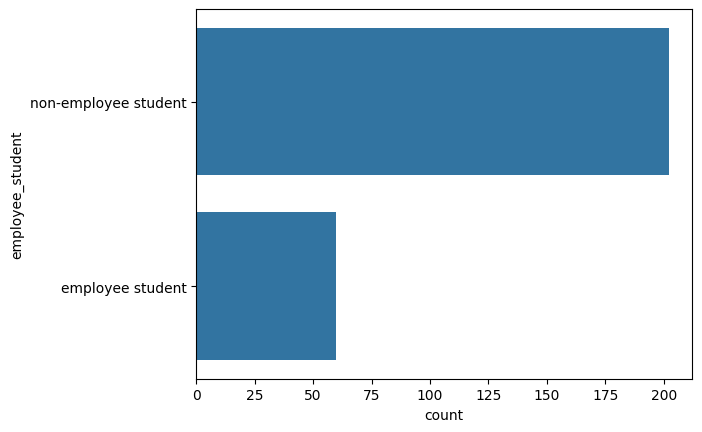

In [ ]:
# prompt: Gere um gráfico de barras horizontais de data['employee_student']

sns.countplot(y="employee_student", data=data)


# Bolsistas

In [ ]:
bolsistas = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/Bolsistas_ccet.xlsx")

In [ ]:
bolsistas

,DT_INICIO,DT_TERMINO,MATR_BOLSISTA,NOME_BOLSISTA,COD_BOLSA,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO
0,01/04/2015,31/03/2016,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2015
1,01/04/2016,31/08/2016,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2016
2,01/09/2017,31/03/2018,20102210001,Aline Sales da Silva Guedes,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,200.0,Valor,2017
3,01/12/2023,31/10/2024,20202230019,ALEXANDRE CARDOSO PAULINO,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Ativo,300.0,Valor,2023
4,01/05/2023,30/04/2024,20221230022,ALEXSANDRA JESSICA SOARES DE LIMA,AA,Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,250.0,Valor,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,01/04/2019,20/05/2019,20181220015,TOMAS DE MOURA,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2019
1350,01/02/2019,31/12/2019,20171210012,VICTOR HUGO SOUZA WIRZ,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2019
1351,01/02/2021,31/12/2021,20181230027,VICTOR PINHEIRO DO NASCIMENTO,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Pró-Reitoria de Graduação,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2021
1352,01/03/2017,31/12/2017,20152210031,VINICIUS MARQUES ZAMITH,PROTES,Programa de de Tutoria Especial da UNIRIO,1.30.,Sistemas de Informação - Bacharelado - Turno I...,SISTEMAS DE INFORMAÇÃO - BACHARELADO,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2017


In [ ]:
# prompt: Printe os DESCR_BOLSA únicos

print(bolsistas['DESCR_BOLSA'].unique())


['Auxilio Alimentação' 'Auxílio Moradia' 'Bolsa de Incentivo Acadêmico'
 'Bolsa Incentivo Acadêmico + Auxilio Alimentação'
 'Bolsa de Iniciação Científica  da UNIRIO nas Ações Afirmativas'
 'Bolsa de Iniciação Científica da UNIRIO' 'MONITORIA DE GRADUAÇÃO'
 'Bolsistas da Incubadora PET/UNIRIO'
 'Programa Institucional de Bolsas de Cultura'
 'Programa Institucional de Bolsas de Extensão'
 'Programa Institucional de Iniciação Científica'
 'Programa de Iniciação Científica nas Ações Afirmativas'
 'PROGRAMA INSTITUCIONAL DE BOLSA DE INICIAÇÃO A DOCÊNCIA'
 'Programa de Acompanhamento de Discente de Graduação'
 'Programa de de Tutoria Especial da UNIRIO']


In [ ]:
import pandas as pd

# Supondo que bolsistas é um DataFrame pandas
bolsas_academicas = [
    'Bolsa de Iniciação Científica da UNIRIO nas Ações Afirmativas',
    'Bolsa de Iniciação Científica da UNIRIO',
    'MONITORIA DE GRADUAÇÃO',
    'Bolsistas da Incubadora PET/UNIRIO',
    'Programa Institucional de Bolsas de Cultura',
    'Programa Institucional de Bolsas de Extensão',
    'Programa Institucional de Iniciação Científica',
    'Programa de Iniciação Científica nas Ações Afirmativas',
    'PROGRAMA INSTITUCIONAL DE BOLSA DE INICIAÇÃO A DOCÊNCIA',
    'Programa de Acompanhamento de Discente de Graduação',
    'Programa de de Tutoria Especial da UNIRIO'
]

bolsas_sociais = [
    'Auxilio Alimentação',
    'Auxílio Moradia',
    'Bolsa de Incentivo Acadêmico',
    'Bolsa Incentivo Acadêmico + Auxilio Alimentação'
]

# Função para classificar as bolsas
def classificar_bolsa(bolsa):
    if bolsa in bolsas_academicas:
        return 'bolsa acadêmica'
    elif bolsa in bolsas_sociais:
        return 'bolsa social'
    else:
        return 'não classificada'

# Criando a nova coluna com a classificação
bolsistas['tipo_bolsa'] = bolsistas['DESCR_BOLSA'].apply(classificar_bolsa)

# Exibir o DataFrame com a nova coluna
print(bolsistas.head())


    DT_INICIO  DT_TERMINO  MATR_BOLSISTA                      NOME_BOLSISTA  \
0  01/04/2015  31/03/2016    20102210001        Aline Sales da Silva Guedes   
1  01/04/2016  31/08/2016    20102210001        Aline Sales da Silva Guedes   
2  01/09/2017  31/03/2018    20102210001        Aline Sales da Silva Guedes   
3  01/12/2023  31/10/2024    20202230019          ALEXANDRE CARDOSO PAULINO   
4  01/05/2023  30/04/2024    20221230022  ALEXSANDRA JESSICA SOARES DE LIMA   

  COD_BOLSA          DESCR_BOLSA LOTACAO  \
0        AA  Auxilio Alimentação   1.00.   
1        AA  Auxilio Alimentação   1.00.   
2        AA  Auxilio Alimentação   1.00.   
3        AA  Auxilio Alimentação   1.00.   
4        AA  Auxilio Alimentação   1.00.   

                                       NOME_UNIDADE  \
0  Universidade Federal do Estado do Rio de Janeiro   
1  Universidade Federal do Estado do Rio de Janeiro   
2  Universidade Federal do Estado do Rio de Janeiro   
3  Universidade Federal do Estado do Rio

In [ ]:
merged_data = pd.merge(data, bolsistas, left_on=['NOME_PESSOA'], right_on=['NOME_BOLSISTA'])
merged_data

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO_y,tipo_bolsa
0,4100879,2345,LORENNA GIANNINI ALVES MOREIRA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,F,DIS - Dispensa sem nota,...,Bolsa de Iniciação Científica da UNIRIO,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
1,4100879,2345,LORENNA GIANNINI ALVES MOREIRA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,F,DIS - Dispensa sem nota,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Ciências Sociais,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2016,bolsa acadêmica
2,4100879,2345,LORENNA GIANNINI ALVES MOREIRA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,F,DIS - Dispensa sem nota,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
3,4101285,2751,RAFAEL DIRQUES DAVID REGIS,2021.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.1,M,APV- Aprovado,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Engenharia de Produção,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2017,bolsa acadêmica
4,4101285,2751,RAFAEL DIRQUES DAVID REGIS,2021.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.1,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2016,bolsa acadêmica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,6227344,7678,JORGE LIMA ALVES,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,6.2,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2021,bolsa acadêmica
90,6227344,7678,JORGE LIMA ALVES,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,6.2,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2020,bolsa acadêmica
91,6227344,7678,JORGE LIMA ALVES,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,6.2,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,MATEMÁTICA - LICENCIATURA,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2019,bolsa acadêmica
92,6227344,7678,JORGE LIMA ALVES,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,DESENHO PARA ENGENHARIA,6.2,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2023,bolsa acadêmica


In [ ]:
merged_data_bolsistas_unicos = merged_data .drop_duplicates(subset="NOME_PESSOA")
merged_data_bolsistas_unicos

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,DESCR_BOLSA,LOTACAO,NOME_UNIDADE,NOME_CURSO_DIPLOMA,CENTRO ACADÊMICO,SITUACAO_BOLSISTA,VL_BOLSA,TIPO_BOLSA,ANO_y,tipo_bolsa
0,4100879,2345,LORENNA GIANNINI ALVES MOREIRA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,F,DIS - Dispensa sem nota,...,Bolsa de Iniciação Científica da UNIRIO,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2014,bolsa acadêmica
3,4101285,2751,RAFAEL DIRQUES DAVID REGIS,2021.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.1,M,APV- Aprovado,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Engenharia de Produção,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2017,bolsa acadêmica
6,4101350,2816,GABRIEL SILVA ROSA PORTUGAL,2021.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,6.0,M,APV- Aprovado,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,700.0,Valor,2015,bolsa social
8,4101428,2894,AMANDA ESPÍRITO SANTO AGUIAR,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.5,F,APV- Aprovado,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Engenharia de Produção,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2016,bolsa acadêmica
11,4101498,2964,IAGO AUGUSTO SILVA DE SOUZA,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,5.3,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
12,4376249,3155,ALEX LOPES DA SILVA,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,ENGENHARIA DE SERVIÇOS,10.0,M,APV- Aprovado,...,Bolsa Incentivo Acadêmico + Auxilio Alimentação,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,700.0,Valor,2014,bolsa social
13,4376315,3221,ANA NATALI LEAL LOUBACK,2022.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.3,F,APV- Aprovado,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Engenharia de Produção,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2018,bolsa acadêmica
15,4376402,3308,LECIO DE ARAUJO RODRIGUES,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.0,M,APV- Aprovado,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
16,5349501,3627,RICARDO LUIZ DE ARAUJO LIMA,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,3.0,M,REF - Reprovado por falta,...,Programa Institucional de Bolsas de Extensão,1.00.,Universidade Federal do Estado do Rio de Janeiro,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exatas e Tecnologia,Inativo,400.0,Valor,2015,bolsa acadêmica
17,5349527,3653,THIAGO RIBEIRO FURTADO,2020.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.7,M,APV- Aprovado,...,MONITORIA DE GRADUAÇÃO,1.30.,Departamento de Engenharia de Produção,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,Centro de Ciências Exata

In [ ]:
# Extraia os nomes dos bolsistas em um conjunto para uma busca mais rápida
bolsistas_names = set(merged_data_bolsistas_unicos['NOME_PESSOA'])

data['bolsista'] = np.where(data['NOME_PESSOA'].isin(bolsistas_names),
                                    'bolsista',
                                    'naobolsista')

# Realize o merge entre `data` e `merged_data_bolsistas_unicos` com base no nome da pessoa
data = data.merge(merged_data_bolsistas_unicos[['NOME_PESSOA', 'tipo_bolsa']],
                  on='NOME_PESSOA',
                  how='left')

# Preencha as linhas sem correspondência com 'naobolsista' na coluna `tipo_bolsa`
data['tipo_bolsa'] = np.where(data['tipo_bolsa'].isna(), 'naobolsista', data['tipo_bolsa'])

# Exibir os primeiros registros para verificação
data.head()

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa
0,0,0,PAULA SIMONE GUEIROS VILAÇA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.8,F,APV- Aprovado,...,***743957**,11174395770,2016-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
1,71,71,ELSIO DA SILVA QUARESMA NETO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.1,M,APV- Aprovado,...,***990507**,13699050769,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
2,192,192,RACHEL GOULART BERTO,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.4,F,APV- Aprovado,...,***828197**,15382819700,2018-03-08,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,***877547**,14487754771,2019-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,***006667**,12900666716,2019-04-02,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista


In [ ]:
# prompt: printe data onde data['bolsista'] seja 'bolsista'

data[data['bolsista'] == 'bolsista']


,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa
70,4100879,2345,LORENNA GIANNINI ALVES MOREIRA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,10.0,F,DIS - Dispensa sem nota,...,***847546**,10384754651,2014-02-11,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa acadêmica
81,4101285,2751,RAFAEL DIRQUES DAVID REGIS,2021.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.1,M,APV- Aprovado,...,***370537**,17137053700,2022-01-14,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
82,4101350,2816,GABRIEL SILVA ROSA PORTUGAL,2021.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,6.0,M,APV- Aprovado,...,***216867**,14921686700,2022-01-14,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa social
84,4101428,2894,AMANDA ESPÍRITO SANTO AGUIAR,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.5,F,APV- Aprovado,...,***590797**,16459079706,2022-11-17,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
85,4101498,2964,IAGO AUGUSTO SILVA DE SOUZA,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,5.3,M,APV- Aprovado,...,***945887**,13294588771,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa acadêmica
90,4376249,3155,ALEX LOPES DA SILVA,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,ENGENHARIA DE SERVIÇOS,10.0,M,APV- Aprovado,...,***393937**,13639393783,2023-06-19,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa social
91,4376315,3221,ANA NATALI LEAL LOUBACK,2022.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,7.3,F,APV- Aprovado,...,***132507**,15813250700,2022-11-17,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,bolsista,bolsa acadêmica
95,4376402,3308,LECIO DE ARAUJO RODRIGUES,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.0,M,APV- Aprovado,...,***602617**,13860261746,2022-11-17,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa acadêmica
103,5349501,3627,RICARDO LUIZ DE ARAUJO LIMA,2022.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,3.0,M,REF - Reprovado por falta,...,***276667**,11427666750,2023-01-05,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa acadêmica
104,5349527,3653,THIAGO RIBEIRO FURTADO,2020.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,8.7,M,APV- Aprovado,...,***507467**,16550746795,2021-03-16,0,Não é empresário,Não é empresário,Não é empresário,employee student,bolsista,bolsa acadêmica


# PCD

In [ ]:
pcd = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/PCD.xlsx")

pcd

,CODIGO_CURSO,CURSO,MATRICULA,NOME,SEMESTRE_INGRESSO,ANO_INGRESSO,FORMA_INGRESSO,DATA_INGRESSO,FORMA_EVASAO,DATA_SAIDA,ANO_EVASAO,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO,DEFICIENCIA
0,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20221220023,ANA CAROLINA SANTOS BRANCO MAGALHAES COSTA,1°. semestre,2022,"SISU Escola Publica até 1,5 S.M.",13/04/2022,SEM EVASÃO,NaN,NaN,NaN,29/10/1997,Brasileira,RIO DE JANEIRO,F,NÃO IDENTIFICADO
1,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20181220012,JEAN RODRIGUES,1°. semestre,2018,"SISU Escola Publica, Indep de Renda: Preto, Pa...",07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA
2,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20181220012,JEAN RODRIGUES,1°. semestre,2018,"SISU Escola Publica, Indep de Renda: Preto, Pa...",07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA
3,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20162220003,LUIZ FELIPPE LISBOA MARINS DEL BOSCO,2°. semestre,2016,"SISU Escola Pública, Indep. de Renda : Preto e...",13/06/2016,DESISTÊNCIA SISU,2016-06-13,2016.0,2°. semestre,15/11/1998,NaN,NaN,M,DEFICIÊNCIA AUDITIVA
4,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20212220004,MARIA CECILIA DIAS DE AZEVEDO FURTADO,2°. semestre,2021,"SISU Escola Publica até 1,5 S.M.",08/10/2021,DESISTÊNCIA SISU,2021-11-08,2021.0,2°. semestre,08/02/2003,NaN,NaN,F,NÃO IDENTIFICADO
5,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20171220009,NATASHA PORTO BOMFIM,1°. semestre,2017,SISU Escola Publica - Indep. de Renda,06/02/2017,CAN - CANCELAMENTO GERAL DO CURSO,2020-03-06,2020.0,1°. semestre,17/06/1992,Brasileira,RIO DE JANEIRO,F,BAIXA VISÃO E VISÃO MONOCULAR
6,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20192220007,NILÇA DOS SANTOS CORREA DE SA,2°. semestre,2019,"SISU Escola Publica até 1,5 S.M.",11/07/2019,SEM EVASÃO,NaN,NaN,NaN,25/07/1996,Brasileira,CABO FRIO,F,CEGUEIRA
7,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20192220007,NILÇA DOS SANTOS CORREA DE SA,2°. semestre,2019,"SISU Escola Publica até 1,5 S.M.",11/07/2019,SEM EVASÃO,NaN,NaN,NaN,25/07/1996,Brasileira,CABO FRIO,F,CEGUEIRA
8,220,ENGENHARIA DE PRODUÇÃO - BACHARELADO - HABILIT...,20172220025,PAULO JOSE WACCANI ZAGUI,2°. semestre,2017,"SISU Escola Publica até 1,5 S.M.",10/08/2017,SEM EVASÃO,NaN,NaN,NaN,17/10/1976,Brasileira,RIO DE JANEIRO,M,SURDEZ
9,601TRI,MATEMÁTICA - LICENCIATURA,11216010015,ALMIR FERREIRA GOMES,2°. semestre,2011,VE - Vestibular,01/08/2011,ABA - ABANDONO DO CURSO,2015-06-20,2015.0,1°. semestre,10/08/1959,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA FÍSICA


In [ ]:
merged_data = pd.merge(data, pcd, left_on=['NOME_PESSOA'], right_on=['NOME'])
merged_data

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO_x,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO_x,DESCR_SITUACAO,...,DATA_INGRESSO,FORMA_EVASAO_y,DATA_SAIDA,ANO_EVASAO_y,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO_y,DEFICIENCIA
0,5692152,5592,NATASHA PORTO BOMFIM,2020.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,PROGRAMAÇÃO-I,8.58,F,APV- Aprovado,...,06/02/2017,CAN - CANCELAMENTO GERAL DO CURSO,2020-03-06,2020.0,1°. semestre,17/06/1992,Brasileira,RIO DE JANEIRO,F,BAIXA VISÃO E VISÃO MONOCULAR
1,6169308,6216,JEAN RODRIGUES,2021.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,4.00,M,REF - Reprovado por falta,...,07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA
2,6169308,6216,JEAN RODRIGUES,2021.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,4.00,M,REF - Reprovado por falta,...,07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA


In [ ]:
merged_data_pcd_unicos = merged_data .drop_duplicates(subset="NOME_PESSOA")
merged_data_pcd_unicos

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO_x,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO_x,DESCR_SITUACAO,...,DATA_INGRESSO,FORMA_EVASAO_y,DATA_SAIDA,ANO_EVASAO_y,PERIODO_EVASAO,DATA_NASCIMENTO,NACIONALIDADE,NATURALIDADE,SEXO_y,DEFICIENCIA
0,5692152,5592,NATASHA PORTO BOMFIM,2020.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,PROGRAMAÇÃO-I,8.58,F,APV- Aprovado,...,06/02/2017,CAN - CANCELAMENTO GERAL DO CURSO,2020-03-06,2020.0,1°. semestre,17/06/1992,Brasileira,RIO DE JANEIRO,F,BAIXA VISÃO E VISÃO MONOCULAR
1,6169308,6216,JEAN RODRIGUES,2021.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,INTRODUÇÃO À ADMINISTRAÇÃO,4.00,M,REF - Reprovado por falta,...,07/02/2018,CAN - CANCELAMENTO GERAL DO CURSO,2021-06-21,2021.0,1°. semestre,16/11/1987,Brasileira,RIO DE JANEIRO,M,DEFICIÊNCIA AUDITIVA


In [ ]:
# Extraia os nomes dos bolsistas em um conjunto para uma busca mais rápida
bolsistas_names = set(merged_data_pcd_unicos ['NOME_PESSOA'])

# Crie a nova coluna `employee_student` em `data`
data['disability'] = np.where(data['NOME_PESSOA'].isin(bolsistas_names),
                                    'have_disability',
                                    'dont_have_disability')

# Exibir os primeiros registros para verificação
data.head()

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa,disability
0,0,0,PAULA SIMONE GUEIROS VILAÇA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.8,F,APV- Aprovado,...,11174395770,2016-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
1,71,71,ELSIO DA SILVA QUARESMA NETO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.1,M,APV- Aprovado,...,13699050769,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
2,192,192,RACHEL GOULART BERTO,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.4,F,APV- Aprovado,...,15382819700,2018-03-08,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,14487754771,2019-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,12900666716,2019-04-02,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability


# Download

In [ ]:
file_name = file_name+"_3.xlsx"
data.to_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name)


In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,DESCR_SITUACAO,...,CPF_MASCARA,DT_EVASAO,Empresario,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria,employee_student,bolsista,tipo_bolsa,disability
0,0,0,PAULA SIMONE GUEIROS VILAÇA,2016.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,6.8,F,APV- Aprovado,...,11174395770,2016-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
1,71,71,ELSIO DA SILVA QUARESMA NETO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.1,M,APV- Aprovado,...,13699050769,2023-10-10,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
2,192,192,RACHEL GOULART BERTO,2017.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.4,F,APV- Aprovado,...,15382819700,2018-03-08,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
3,260,260,CEZAR AUGUSTO PUREZA FIGUEIREDO,2019.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,8.3,M,APV- Aprovado,...,14487754771,2019-12-13,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
4,303,303,RODRIGO GRANJA COSTA,2018.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO DIFERENCIAL E INTEGRAL-I,7.6,M,APV- Aprovado,...,12900666716,2019-04-02,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,6227515,7849,JOAO PAULO DE FREITAS RIBEIRO,2023.0,nao-cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,M,REF - Reprovado por falta,...,7766978113,2024-02-06,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
258,6227522,7856,NATALY RIBEIRO DE OLIVEIRA,NaN,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.0,F,REF - Reprovado por falta,...,17472355712,2023-03-17,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
259,6227533,7867,ANA CAROLINA DA SILVA DE SOUZA,2023.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,0.5,F,REF - Reprovado por falta,...,19807939720,2023-08-24,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
260,6227540,7874,DANIELA SANTIAGO AMORIM TEIXEIRA,2024.0,cotistas,Engenharia de Produção - Bac.- Hab. Prod. Cult...,CÁLCULO-0,7.1,F,APV- Aprovado,...,18916650739,2024-02-19,0,Não é empresário,Não é empresário,Não é empresário,non-employee student,naobolsista,naobolsista,dont_have_disability
